
First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   speci

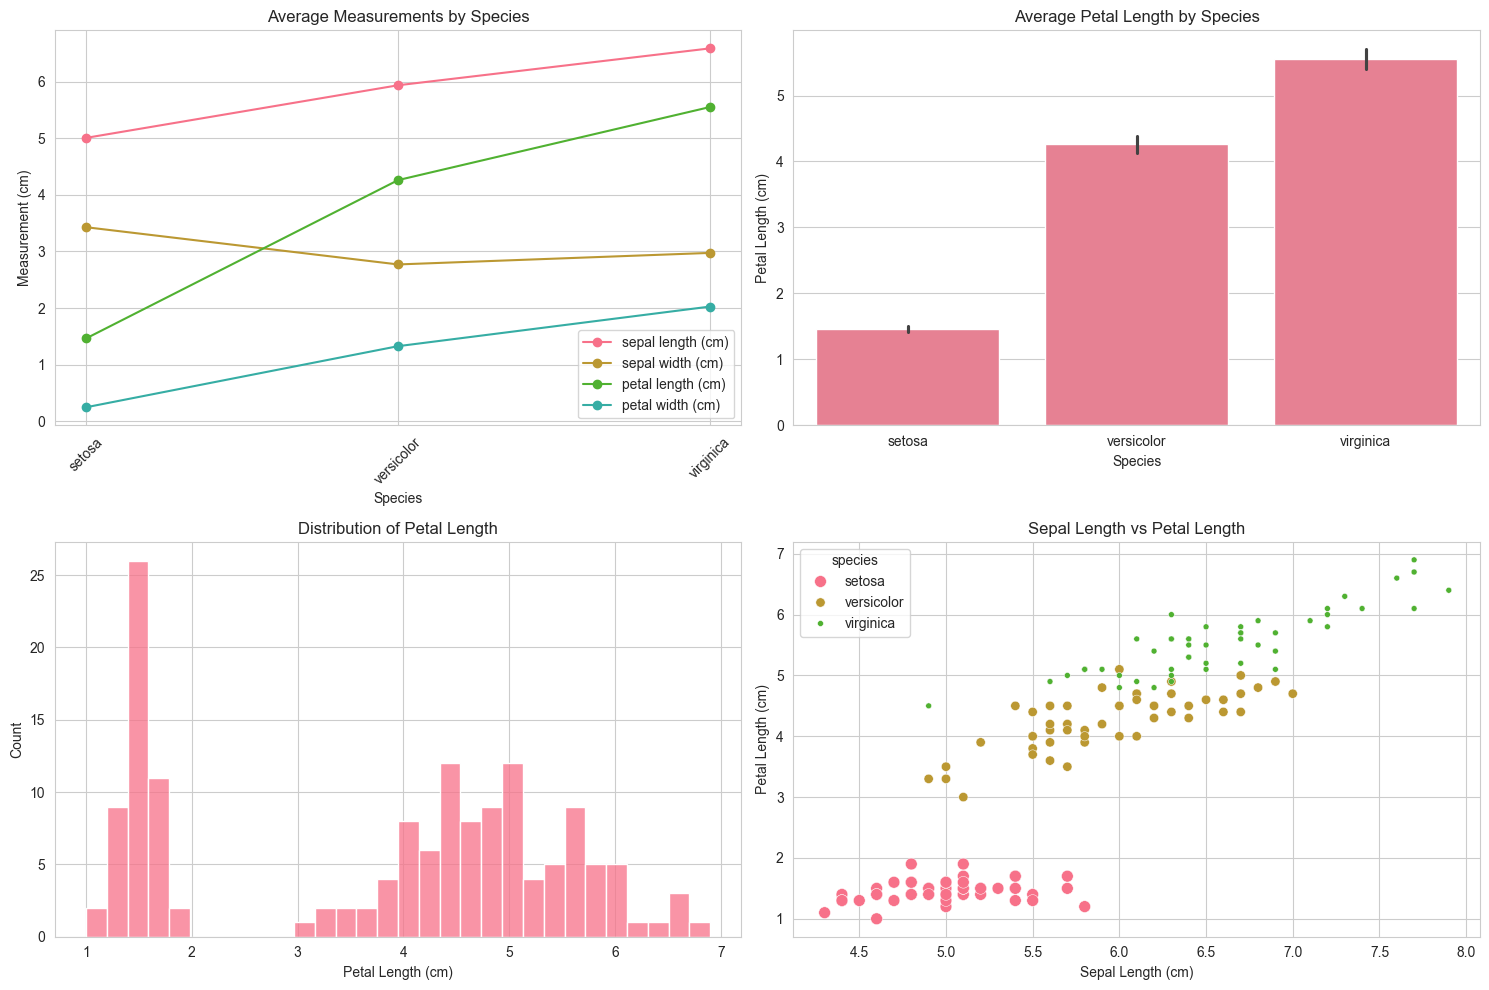

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

sns.set_style('whitegrid')
sns.set_palette("husl")

def load_and_explore_data():
    try:
        iris = load_iris()
        df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
        df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
        print("\nFirst 5 rows of the dataset:")
        print(df.head())
        print("\nDataset Info:")
        print(df.info())
        print("\nMissing Values:")
        print(df.isnull().sum())
        return df
    except Exception as e:
        print(f"Error loading dataset: {str(e)}")
        return None

def analyze_data(df):
    try:
        print("\nBasic Statistics:")
        print(df.describe())
        print("\nMean measurements by species:")
        group_means = df.groupby('species', observed=True).mean()
        print(group_means)
        # I wanted to add a few observations based on the analysis
        print("\nObservations:")
        print("1. Different species show distinct measurements patterns.")
        print("2. Setosa tends to have smaller measurements overall.")
        print("3. Virginica generally has larger measurements, especially in petal length.")
        return group_means
    except Exception as e:
        print(f"Error analyzing data: {str(e)}")
        return None

def create_visualizations(df):
    try:
        fig = plt.figure(figsize=(15, 10))
        plt.subplot(2, 2, 1)
        group_means = df.groupby('species', observed=True).mean()
        for column in group_means.columns:
            plt.plot(group_means.index, group_means[column], marker='o', label=column)
        plt.title('Average Measurements by Species')
        plt.xlabel('Species')
        plt.ylabel('Measurement (cm)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.subplot(2, 2, 2)
        sns.barplot(x='species', y='petal length (cm)', data=df)
        plt.title('Average Petal Length by Species')
        plt.xlabel('Species')
        plt.ylabel('Petal Length (cm)')
        plt.subplot(2, 2, 3)
        sns.histplot(data=df, x='petal length (cm)', bins=30)
        plt.title('Distribution of Petal Length')
        plt.xlabel('Petal Length (cm)')
        plt.ylabel('Count')
        plt.subplot(2, 2, 4)
        sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', 
                       hue='species', size='species')
        plt.title('Sepal Length vs Petal Length')
        plt.xlabel('Sepal Length (cm)')
        plt.ylabel('Petal Length (cm)')
        plt.tight_layout()
        plt.savefig('iris_visualizations.png')
        plt.show()
    except Exception as e:
        print(f"Error creating visualizations: {str(e)}")

def main():
    df = load_and_explore_data()
    if df is not None:
        analyze_data(df)
        create_visualizations(df)
main()

Additional Findings:
1. The scatter plot shows clear clustering of species based on sepal and petal measurements.
2. The histogram reveals a multimodal distribution in petal length, likely corresponding to different species.
3. The bar chart confirms significant differences in petal length between species.
4. The line chart shows consistent patterns across all measurements, with virginica having the largest measurements.